In [1]:
# Import Qiskit and IonQ
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_provider import IBMProvider
# from qiskit_ionq import IonQProvider

# Save the IBM account if needed
# token = 'token'
# QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True)

# Load IBM and IonQ accounts
service = QiskitRuntimeService(channel="ibm_quantum", instance=None)
provider = IBMProvider()
# ionq_provider = IonQProvider()

# Display available backends
print(provider.backends())

[<IBMBackend('ibmq_quito')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_lagos')>, <IBMBackend('simulator_mps')>, <IBMBackend('ibmq_manila')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibmq_jakarta')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('ibmq_lima')>, <IBMBackend('ibmq_belem')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('ibm_oslo')>]


In [2]:
# Set backend like this
backend = "ibmq_qasm_simulator"

In [3]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import Session, Sampler, Options
from qw.staggered_dsg_circuit_3t_un import *

In [4]:
# Overall setting
shots = 4000
size_degree = 2
displacement_dict = {"000000001":0, "000000010":1, "000000100":1, 
                     "000001000":9, "000010000":7, "000100000":4,
                     "001000000":9, "010000000":4, "100000000":7}

In [5]:
# Simulation setting
steps = 300
dt = 0.01
layers = 16
t = np.linspace(dt, steps*dt, steps)
name = f'dsg_3tqw_un_o{size_degree:d}_XY_{steps*dt:.1f}s_{layers:d}ly'

In [6]:
# Build a circuit list.
circuits = []
for i in range(steps):
    circuits.append(staggered_dsg_circuit_3t_un(size_degree, t[i], layers, model='XY'))
# circs[20].draw('mpl')

# Run QASM simulator
backend = "ibmq_qasm_simulator"
options = Options(simulator={"seed_simulator": 42}, resilience_level=0)
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(
        circuits=circuits,
        shots=shots
    )
    results = job.result()

# Print job status
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cgkd0iump35sb7kougp0
>>> Job Status: JobStatus.DONE


In [7]:
# Extract (quasi-)probability distribution
qd_list = list()
for i in range(steps):
    qd_list.append(results.quasi_dists[i].binary_probabilities())

# Compute mean square displacement
msd_list = list()
for i in range(steps):
    msd_temp = 0.
    for bit, prob in qd_list[i].items():
        msd_temp += displacement_dict.get(bit)*prob
    msd_list.append(msd_temp)

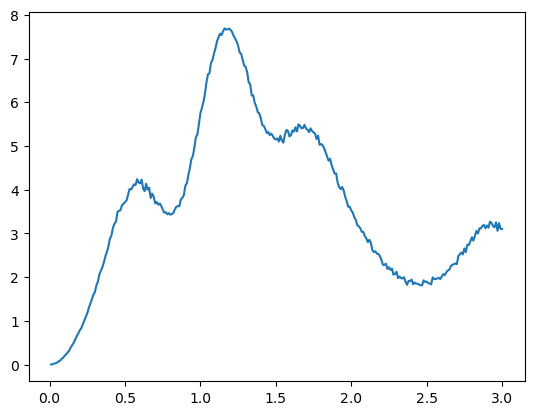

In [8]:
# Plot t - MSD
plt.plot(t, msd_list)
plt.show()

In [10]:
# Save qd_list
import pickle

with open(f'data/simulator/{backend}_{name}_qd_list.pkl','wb') as file :
    pickle.dump(qd_list, file)

In [11]:
# Save msd_list
import csv

with open(f'data/simulator/{backend}_{name}_msd_list.csv','w') as file :
    write = csv.writer(file)
    write.writerow(msd_list)

In [6]:
# Experiment setting
steps = 300
dt = 0.01
layers = 2
t = np.linspace(dt, steps*dt, steps)
name = f'dsg_3tqw_un_o{size_degree:d}_{steps*dt:.1f}s_{layers:d}ly'

In [7]:
# Build a circuit list.
circuits = []
for i in range(steps):
    circuits.append(staggered_dsg_circuit_3t_un(size_degree, t[i], layers))

# Run QPU
backend = "ibm_hanoi"
options = Options(resilience_level=1)
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(
        circuits=circuits,
        shots=shots
    )
    results = job.result()

# Print job status
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

In [9]:
# Extract (quasi-)probability distribution
qd_list = list()
for i in range(steps):
    qd_list.append(results.quasi_dists[i].binary_probabilities())

# Compute mean square displacement
# Count valid results only
msd_list = list()
for i in range(steps):
    valid_prob = 0
    for bit, prob in qd_list[i].items():
        valid_prob += (displacement_dict.get(bit, -1) > -1)*prob
    msd_temp = 0.
    for bit, prob in qd_list[i].items():
        msd_temp += displacement_dict.get(bit, 0)*prob/valid_prob
    msd_list.append(msd_temp)

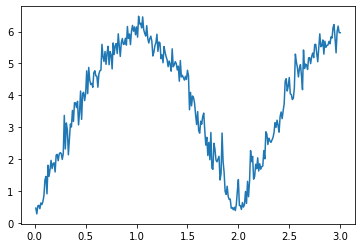

In [10]:
# Plot t - MSD
plt.plot(t, msd_list)
plt.show()

In [11]:
# Save qd_list
import pickle

with open(f'data/qpu/{backend}_{name}_qd_list.pkl','wb') as file :
    pickle.dump(qd_list, file)

In [ ]:
# Save msd_list
import csv

with open(f'data/qpu/{backend}_{name}_msd_list.csv','w') as file :
    write = csv.writer(file)
    write.writerow(msd_list)

In [ ]:
# IonQ simulation (outdated)
# sys = 'ionq_simulator'
# backend = ionq_provider.get_backend(sys)

In [ ]:
# steps = 300
# dt = 0.01
# layers = 2
# t = np.linspace(dt, steps*dt, steps)
# name = f'dsg_3tqw_un_o{size_degree:d}_{steps*dt:.1f}s_{layers:d}ly'

In [25]:
# counts_list = list()

# for i in range(steps):
#     circ = staggered_dsg_circuit_3t_un(size_degree, t[i], layers)
#     transpiled_circ = transpile(circ, backend, optimization_level=2)
#     job = backend.run(transpiled_circ, shots=shots)
#     results = job.result()
#     counts_list.append(results.get_counts())
#     if i%10 == 0:
#         print(f'in prograss... {i}%')

# print(f'complete!      100%')

in prograss... 0%
in prograss... 10%
in prograss... 20%
in prograss... 30%
in prograss... 40%
in prograss... 50%
in prograss... 60%
in prograss... 70%
in prograss... 80%
in prograss... 90%
complete!      100%


In [18]:
# msd_temp = 0.
# msd_list = list()

# for i in range(steps):
#     msd_temp = 0.
#     for bits, number in counts_list[i].items():
#         msd_temp += displacement_dict.get(bits)*number/shots
#     msd_list.append(msd_temp)

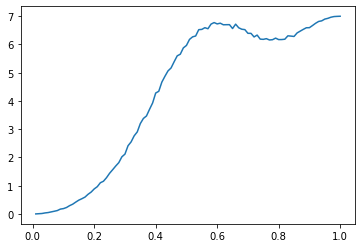

In [26]:
# plt.plot(t, msd_list)

In [27]:
# import pickle

# with open(f'data/simulator/{sys}_{name}_counts_list.pkl','wb') as file :
#     pickle.dump(counts_list, file)

In [28]:
# import csv

# with open(f'data/simulator/{sys}_{name}_msd_list.csv','w') as file :
#     write = csv.writer(file)
#     write.writerow(msd_list)